# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set()

# Loading the raw data. Preprocessing

In [2]:
raw_csv_data = pd.read_csv('Internship_train.csv')

In [3]:
df = raw_csv_data.copy()
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
5,70,299,297,350,428,359,5.830952,0.505189,1,73,...,1.486867,0.366128,11.245683,6.116113,9.315978,4.063209,7.156703,12.132241,14.141104,34.505189
6,457,363,162,67,388,326,-1.414214,0.604309,0,258,...,8.260282,5.239815,1.163579,10.797268,5.819056,4.451118,14.645322,11.739865,14.763017,2.604309
7,414,271,163,317,359,116,-6.324555,0.022464,0,485,...,5.925065,6.080010,11.318467,11.013787,12.137311,2.759765,10.537518,4.243830,3.232530,40.022464
8,420,85,378,71,243,301,-8.602325,0.228071,0,401,...,5.483159,1.534398,4.690240,11.142059,12.290323,1.975012,11.061706,14.486846,13.244187,74.228071
9,445,304,359,298,141,369,8.774964,0.919384,1,63,...,12.267670,4.999463,0.376892,0.121794,0.914422,12.471633,13.760204,14.500278,4.583603,77.919384


In [4]:
pd.options.display.max_columns = None

In [5]:
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,178,76,348,14.989801,12.913119,0.789832,10.856197,8.591279,7.968858,9.509544,3.955120,7.791087,14.257839,13.572782,8.947885,2.876215,7.642254,14.160247,11.825506,1.501115,0.851685,13.548914,14.200126,14.024736,14.167319,0.611344,0.732394,3.520474,6.228447,14.242166,14.128165,4.484611,2.652550,5.252173,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,403,148,235,7.247185,5.115267,3.746703,3.740138,14.427067,5.781403,0.883131,3.902929,7.071976,13.320995,4.640709,7.513765,6.078456,6.610711,1.794003,8.786412,8.870879,12.302675,13.452448,1.273859,14.014123,2.376862,8.586295,4.201155,14.090207,12.860619,2.122497,6.283776,6.132219,0.105138,14.736929,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,341,367,100,5.279235,7.009082,10.935735,8.021958,6.831974,3.307797,7.105333,1.811442,0.783213,4.724424,8.277381,11.951288,1.082756,4.647406,5.337085,7.735140,7.631099,1.434334,14.404213,10.869571,10.239867,0.109270,2.184964,9.920078,13.557691,9.398788,11.267561,1.338452,12.764249,8.593937,7.296410,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,410,197,37

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

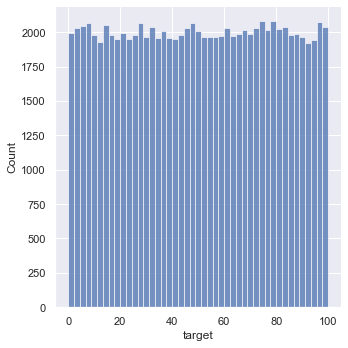

In [8]:
sns.displot(df['target'])

# Feature selection

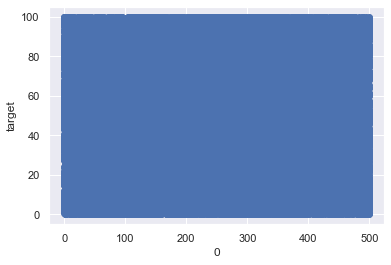

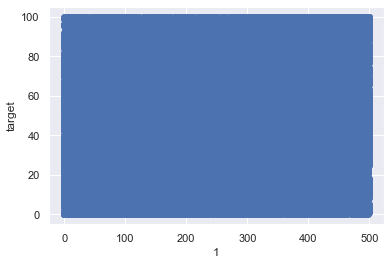

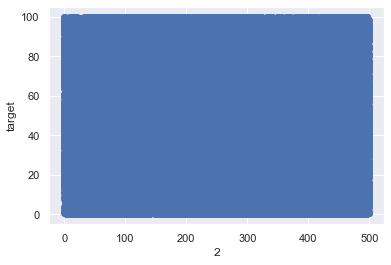

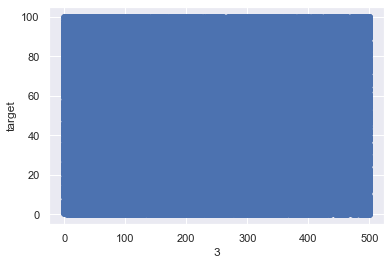

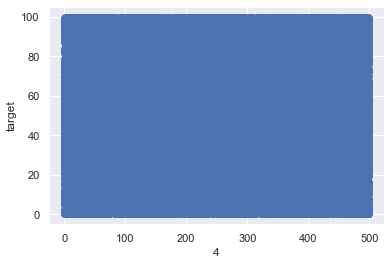

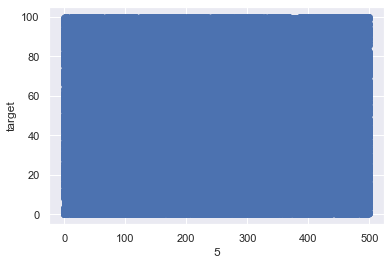

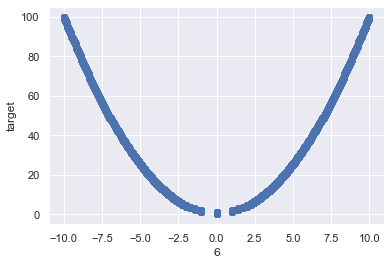

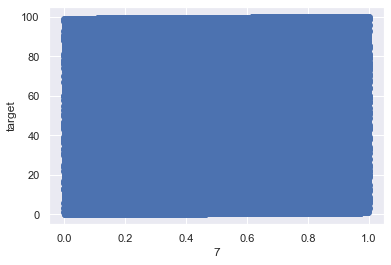

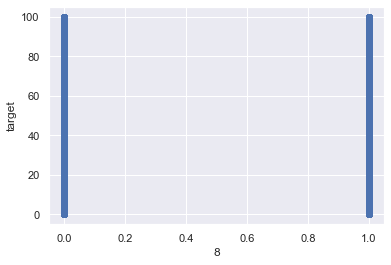

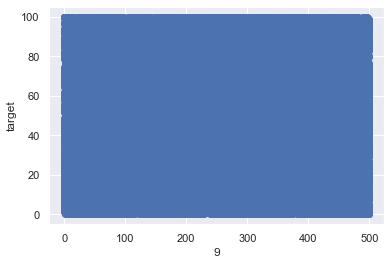

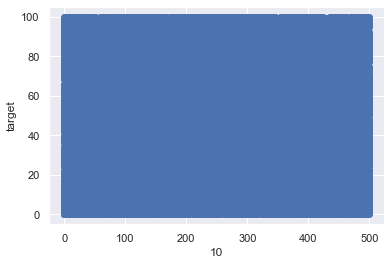

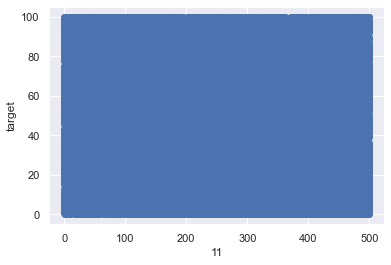

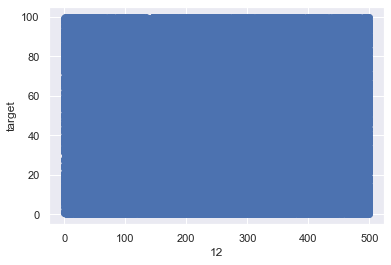

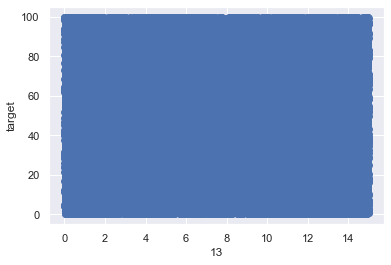

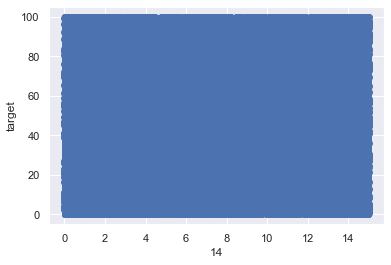

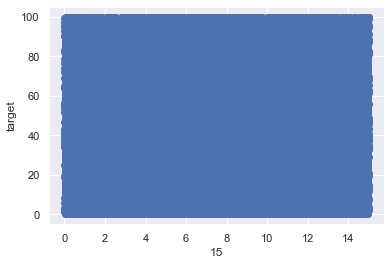

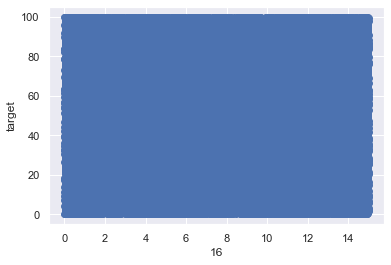

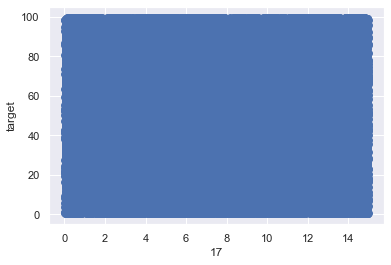

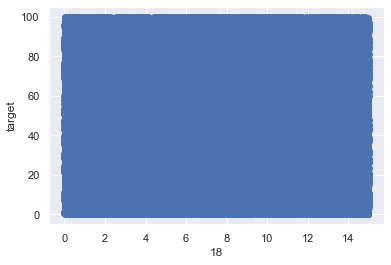

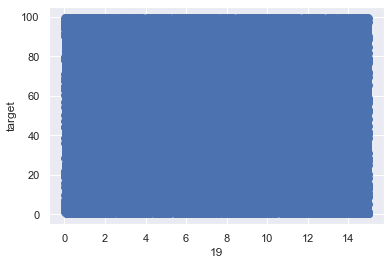

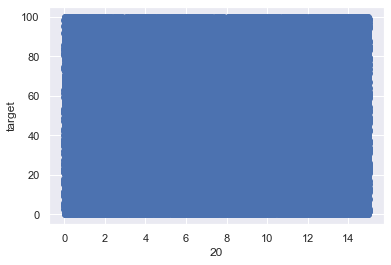

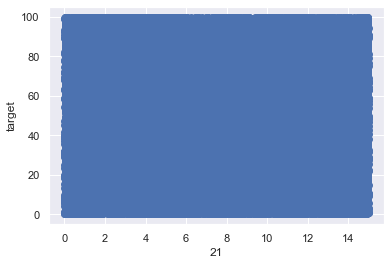

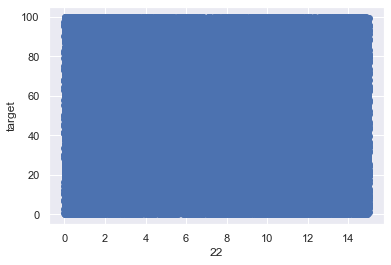

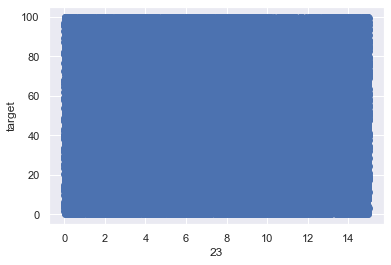

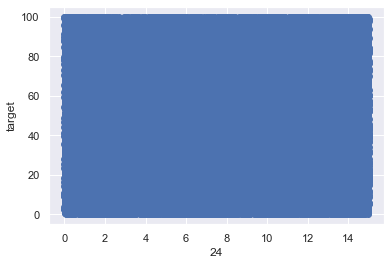

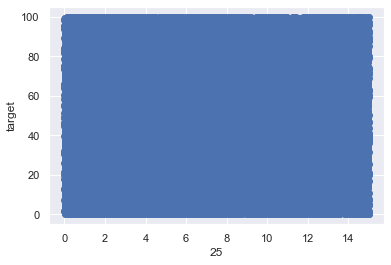

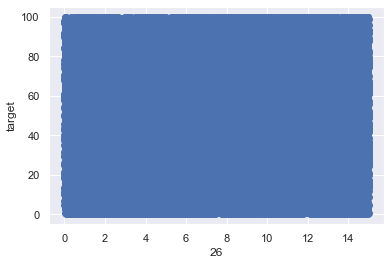

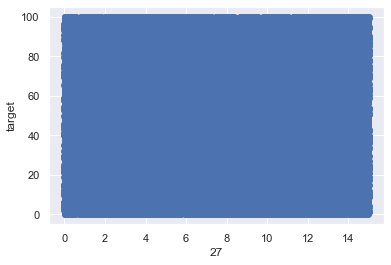

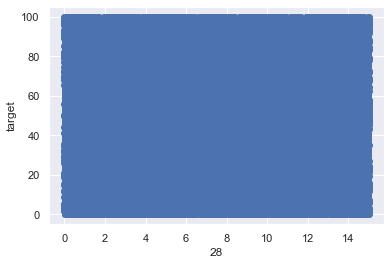

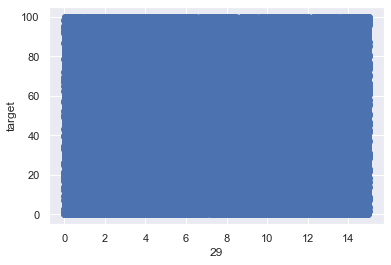

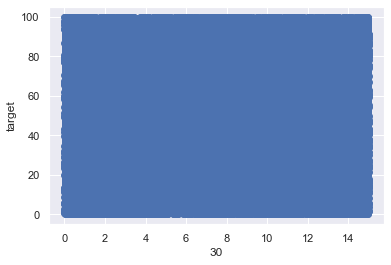

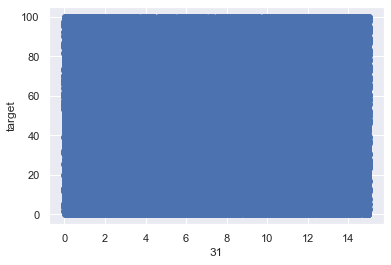

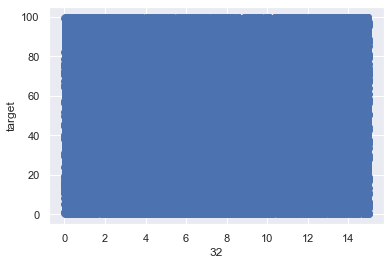

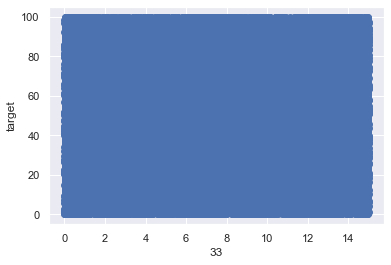

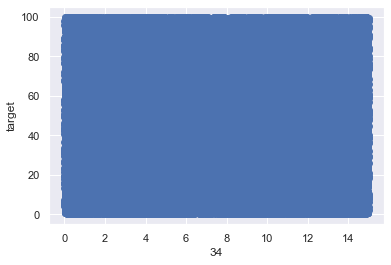

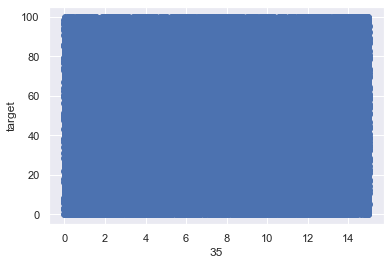

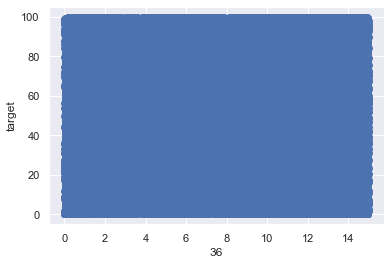

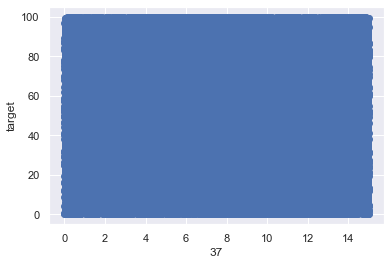

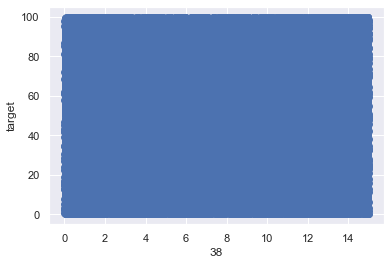

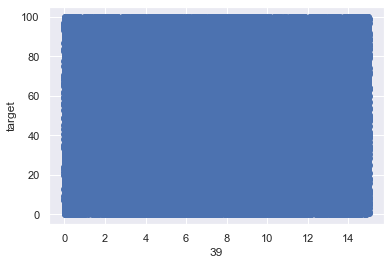

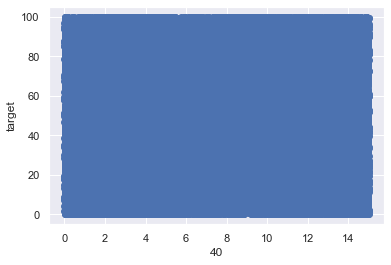

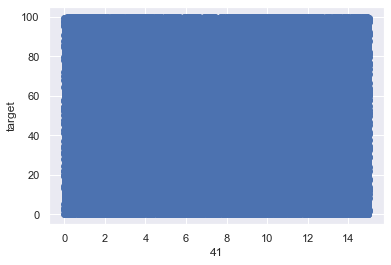

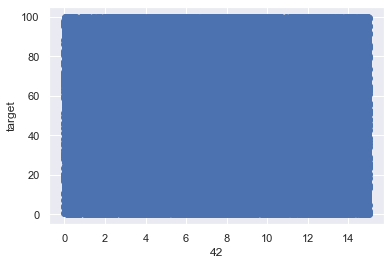

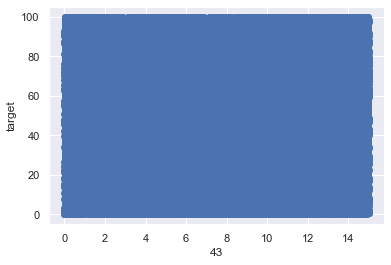

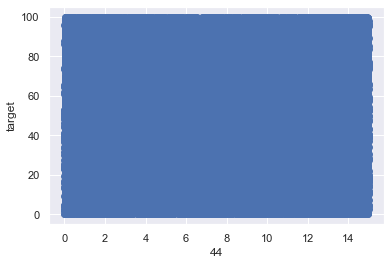

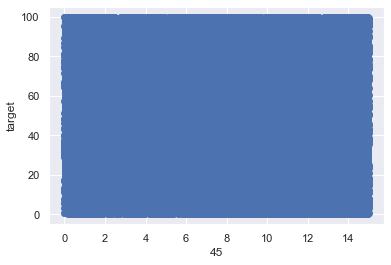

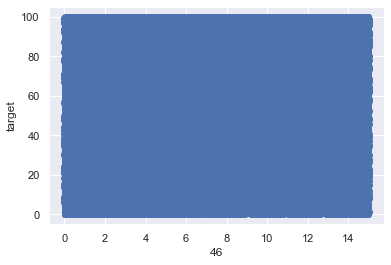

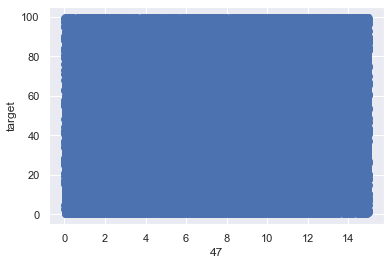

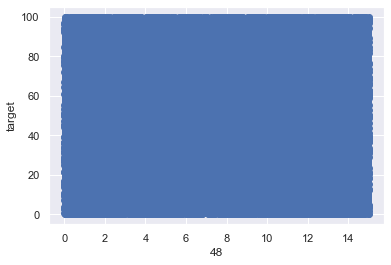

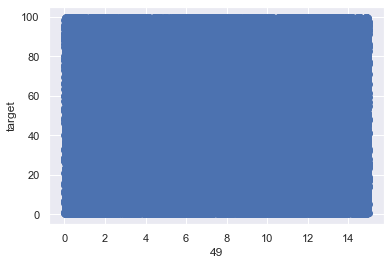

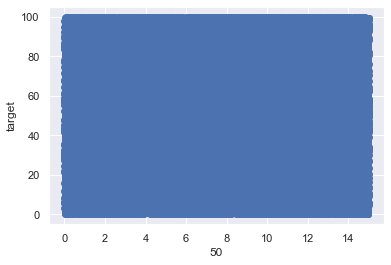

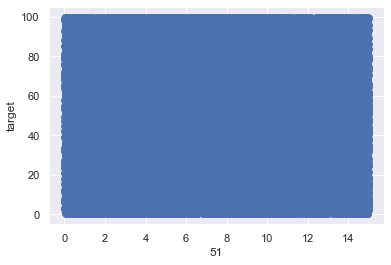

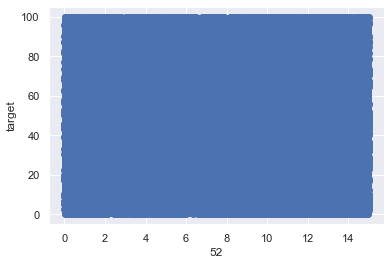

In [9]:
for i in range(0, 53):
    feature = '' + str(i)
    plt.scatter(df[feature], df['target'])
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()

In [10]:
#Only feature '6' is meaningful for our analysis, all other seems random.
cleaned_df = df[['6', 'target']]
cleaned_df.head()

,6,target
0,-4.472136,20.107472
1,7.810250,61.763713
2,8.602325,74.651162
3,8.306624,69.424645
4,8.124038,66.767304


In [11]:
cleaned_df.describe()

,6,target
count,90000.000000,90000.000000
mean,-0.011402,50.033981
std,7.038171,28.897243
min,-9.949874,0.002634
25%,-7.071068,25.091903
50%,0.000000,50.030705
75%,7.000000,75.059454
max,9.949874,99.999482


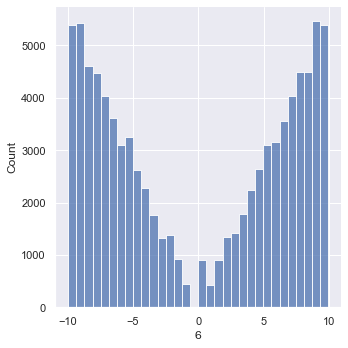

In [12]:
sns.displot(df['6'])

In [13]:
features = cleaned_df['6']
targets = cleaned_df['target']
X = np.array(features)
y = np.array(targets)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))

# Regression model

In [16]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_poly)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.2876218598900486


# Predictions

In [20]:
data_for_predictions = pd.read_csv('Internship_hidden_test.csv')

In [21]:
data_for_predictions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [22]:
df_for_predictions = data_for_predictions.copy()
df_for_predictions.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,248.387400,250.191800,248.064900,249.992200,251.642200,249.678600,-0.079268,0.505215,0.492200,245.823600,249.164800,250.119100,250.483700,7.510013,7.422919,7.524276,7.480496,7.542805,7.486749,7.543878,7.470930,7.487228,7.463924,7.480095,7.463081,7.501495,7.563922,7.529382,7.573613,7.504179,7.516057,7.521130,7.454040,7.583621,7.488388,7.447334,7.541466,7.456547,7.354651,7.449582,7.446619,7.519481,7.510101,7.422179,7.488576,7.526853,7.449717,7.438931,7.563141,7.510016,7.465383,7.503378,7.503662
std,144.124521,144.850399,144.792255,144.015371,144.745324,144.677689,7.032273,0.285678,0.499964,142.852057,144.878226,145.632335,144.900116,4.337977,4.314456,4.359013,4.313662,4.360080,4.343422,4.326001,4.351735,4.342221,4.350220,4.316420,4.333474,4.283716,4.337939,4.325639,4.324341,4.318745,4.327828,4.329726,4.325633,4.340549,4.335361,4.335703,4.339896,4.327846,4.315967,4.355657,4.345184,4.324215,4.327507,4.335234,4.321760,4.340501,4.328863,4.308985,4.347630,4.353635,4.363206,4.338020,4.291431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000735,0.001009,0.002425,0.001938,0.001878,0.000098,0.000112,0.000134,0.000407,0.003713,0.002003,0.000726,0.001153,0.000978,0.000612,0.004882,0.000117,0.005182,0.000698,0.000538,0.000012,0.000360,0.001679,0.000674,0.000438,0.002563,0.001193,0.002578,0.001920,0.000310,0.001103,0.000545,0.001244,0.000026,0.001580,0.000286,0.001716,0.000834,0.000132
25%,123.000000,123.000000,123.000000,128.000000,125.000000,124.000000,-7.071068,0.261199,0.000000,122.000000,123.000000,124.000000,125.000000,3.726694,3.699220,3.705847,3.746302,3.714119,3.705049,3.839919,3.624898,3.709006,3.698120,3.789745,3.711264,3.788748,3.824283,3.832993,3.838422,3.829372,3.777752,3.744229,3.714690,3.787502,3.704058,3.685488,3.793690,3.694083,3.575156,3.658494,3.639790,3.805628,3.810208,3.707353,3.758763,3.762664,3.711092,3.753059,3.805891,3.734299,3.696070,3.758126,3.810301
50%,249.000000,251.000000,246.000000,252.000000,252.000000,249.000000,-1.000000,0.507519,0.000000,244.000000,249.000000,252.000000,251.000000,7.562736,7.395801,7.512628,7.505363,7.552075,7.480087,7.613453,7.477880,7.476664,7.396711,7.443644,7.494765,7.464284,7.590579,7.496124,7.627596,7.525663,7.523263,7.598453,7.436733,7.624858,7.478955,7.340204,7.506271,7.478763,7.302234,7.476156,7.383178,7.528164,7.507894,7.371637,7.531310,7.550432,7.361451,7.377399,7.627437,7.547184,7.441250,7.500340,7.429109
75%,373.000000,377.000000,375.000000,373.000000,379.000000,374.000000,7.071068,0.750603,1.000000,368.000000,374.000000,378.000000,376.000000,11.269315,11.149947,11.332802,11.194596,11.322267,11.265878,11.224627,11.254231,11.282292,11.277635,11.268109,11.207078,11.197466,11.340517,11.301186,11.279402,11.213183,11.273499,11.253210,11.151100,11.321960,11.246703,11.278194,11.364622,11.214660,11.071916,11.245962,11.229083,11.235955,11.271190,11.147130,11.193657,11.311366,11.201442,11.154313,11.338666,11.276399,11.297861,11.268075,11.209570
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999982,1.000000,499.000000,499.000000,499.0

In [23]:
x_new = df_for_predictions[['6']]
x_new = np.array(x_new)
x_new_poly = poly.transform(x_new.reshape(-1, 1))
y_pred = reg.predict(x_new_poly)

In [25]:
model_predictions = pd.DataFrame({'predictions' : y_pred})
df_predictions = pd.concat([df_for_predictions, model_predictions], axis = 1)
df_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,predictions
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191,11.497821
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604,79.499849
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030,7.497881
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819,38.499225
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015,64.497566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,336,168,157,13.747922,3.241869,14.566098,10.875498,4.497404,6.704296,3.025340,13.233415,6.799407,0.142371,3.946266,0.968455,8.582973,0.980167,4.493488,1.387511,8.912422,0.108259,1.206600,8.148427,14.371489,3.657765,14.849912,5.181197,6.538827,1.295357,8.591574,12.420395,9.116474,5.622999,1.272356,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558,45.497608
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,243,285,248,2.862062,4.095265,9.097370,11.436809,3.244317,1.613466,12.030584,11.903144,7.218416,5.709971,5.617769,7.996051,14.162860,4.176828,8.385836,9.688979,6.590254,8.547447,9.202506,14.769587,3.564806,13.584374,9.186445,12.242454,8.991974,5.472906,0.713682,1.054704,12.292797,9.457690,2.331195,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093,32.497657
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,443,436,437,13.584616,1.910589,8.414700,4.713299,12.456836,5.401063,9.953951,11.298651,5.878519,5.681733,1.134211,7.742873,5.487630,10.506416,7.089597,5.675769,1.861678,7.670641,11.537603,12.542419,1.335523,13.817510,12.890768,12.322928,5.761939,12.277804,13.971998,9.802872,6.264889,11.398574,14.423037,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801,22.497716
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,415,45,458,11.4

In [26]:
df_predictions.to_csv('Internship_predictions.csv', index=False)